# Machine Learning and Data Analysis
----------------------------------------------
### *Session 4.2*


```
12th October, 2023
Anna Pallarès López
Computer Engineering Master's

```



In [26]:
# import libraries

import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt

In [27]:
np.random.seed(11)

In [28]:
# define a funtion

def oracle(x):
  #return x
  return x**2
  #return np.sinc(3*x)

In [29]:
n = 500
sigma = .1
d = 1

In [30]:
x = np.random.rand(n)
X = np.asarray(np.asmatrix(x).transpose())
y = oracle(x) + sigma*np.random.rand(n)

In [31]:
ns = 1000
xs = np.linspace(0,1,ns)
Xs = np.asarray(np.asmatrix(xs).transpose())

In [32]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


ytt = np.asarray([])
ypp = np.asarray([])

for i in range(0,10):
  Xlv,Xt, ylv, yt = train_test_split(X,y,test_size = 0.1)

# which values I want to test
grid = {'alpha' : np.logspace(-4,3,30),
        'kernel': ['rbf'],
        'gamma' : np.logspace(-4,3,30)}


# model selection
MS = GridSearchCV(estimator   = KernelRidge(),
                  param_grid = grid,
                  scoring     = 'neg_mean_absolute_error',
                  cv          = 10)
H = MS.fit(Xlv,ylv)

# select the best hyperparameters
M = KernelRidge(alpha  = H.best_params_['alpha'],
                kernel = H.best_params_['kernel'],
                gamma  = H.best_params_['gamma'])
M.fit(Xlv,ylv)

yp = M.predict(Xt)

ytt = np.concatenate((ytt, yt), axis=0)
ypp = np.concatenate((ypp, yp), axis=0)



In [33]:
np.mean(np.abs(yt-yp))

0.021758713749304142

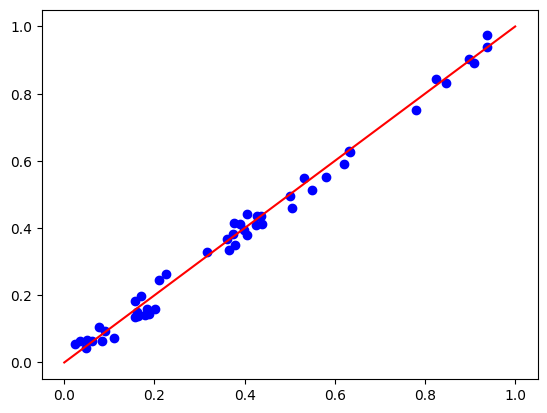

In [34]:
fig, ax = plt.subplots()

ax.plot(ytt,ypp,'bo')
ax.plot([0,1],[0,1],'r')
